# Born to slide: mobile origin licensing factors confer resistance to conflicts with RNA polymerase

<img style="float: left;" src="https://icons.iconarchive.com/icons/dan-wiersma/solar-system/48/Mars-icon.png">

## Jupyter notebooks 

#### Figures:
+ 6C
+ 6E

#### Archives:

#### Additional data:
+ 210804_exp2_OCCM-push-MCM-load_1.csv
+ 210804_exp2_OCCM-push-MCM-load_2.csv
+ 210804_exp2_OCCM-push-MCM-load_3.csv
+ 210804_exp2_OCCM-push-MCM-load_4.csv
+ 210804_exp2_OCCM-push-MCM-load_5.csv

### Imports

In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os


### Figure style and output directory

In [2]:
from figure_style import *

In [3]:
set_style_paper()

In [4]:
dir_out = '/Volumes/pool-duderstadt/Matthias/Manuscript/Figures/SVGs/Figure6+7/'
dir_out

'/Volumes/pool-duderstadt/Matthias/Manuscript/Figures/SVGs/Figure6+7/'

### Load dataset & overview

In [5]:
path = '/Volumes/pool-duderstadt/Matthias/Manuscript/Additional_data/OCCM-push-MCM-load/'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            files.append(os.path.join(r, file))

In [6]:
df = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv(file, sep=';', header=[0])
    df = pd.concat([df, df_temp])

# remove rejected molecules
df = df[(df['tags']!='reject')]
len(df)

1085

In [7]:
df.head()

,Molecule,Ori1_655-MCM_before,Ori1_655-MCM_after,Ori1_pushed,T7T_outcome,Ori1_555-MCM_after,Ori2_655-MCM_before,Ori2_655-MCM_after,Ori2_pushed,Ori2_555-MCM_after,tags,comments
0,0.0,1.0,0.0,1.0,e,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,1.0,0.0,1.0,t,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,2.0,1.0,0.0,1.0,t,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,3.0,1.0,0.0,1.0,t,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,4.0,1.0,0.0,1.0,e,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [8]:
# convert to booleans
#for col in df.drop(['Molecule', 'T7T_outcome', 'tags', 'comments'],axis=1).columns:
    #df[col] = df[col].apply(lambda value: True if value==1 else False)
#df.head()

In [9]:
# convert to 1/0
for col in df.drop(['Molecule', 'T7T_outcome', 'tags', 'comments'],axis=1).columns:
    df[col].fillna(0, inplace=True)
df.head()

,Molecule,Ori1_655-MCM_before,Ori1_655-MCM_after,Ori1_pushed,T7T_outcome,Ori1_555-MCM_after,Ori2_655-MCM_before,Ori2_655-MCM_after,Ori2_pushed,Ori2_555-MCM_after,tags,comments
0,0.0,1.0,0.0,1.0,e,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,1.0,0.0,1.0,t,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,2.0,1.0,0.0,1.0,t,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,3.0,1.0,0.0,1.0,t,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,4.0,1.0,0.0,1.0,e,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [10]:
# if no collision happened => na
df['T7T_outcome'].fillna('na', inplace=True)

In [11]:
df.dtypes

Molecule               float64
Ori1_655-MCM_before    float64
Ori1_655-MCM_after     float64
Ori1_pushed            float64
T7T_outcome             object
Ori1_555-MCM_after     float64
Ori2_655-MCM_before    float64
Ori2_655-MCM_after     float64
Ori2_pushed            float64
Ori2_555-MCM_after     float64
tags                    object
comments                object
dtype: object

### Check for 2-color MCM foci

In [12]:
# colocalizing 655- and 555-MCM => no molecules co-localize in the end
df[(df['Ori1_pushed']==0) & (df['Ori1_655-MCM_after']==1) & (df['Ori1_555-MCM_after']==1)]

,Molecule,Ori1_655-MCM_before,Ori1_655-MCM_after,Ori1_pushed,T7T_outcome,Ori1_555-MCM_after,Ori2_655-MCM_before,Ori2_655-MCM_after,Ori2_pushed,Ori2_555-MCM_after,tags,comments


In [13]:
df[(df['Ori1_pushed']==0) & (df['Ori2_655-MCM_after']==1) & (df['Ori2_555-MCM_after']==1)]

,Molecule,Ori1_655-MCM_before,Ori1_655-MCM_after,Ori1_pushed,T7T_outcome,Ori1_555-MCM_after,Ori2_655-MCM_before,Ori2_655-MCM_after,Ori2_pushed,Ori2_555-MCM_after,tags,comments
79,79.0,0.0,0.0,0.0,na,0.0,1.0,1.0,0.0,1.0,NaN,NaN


In [14]:
# OCCM pushed from ori1 to ori2, then 2-color loading
df[(df['Ori1_pushed']==1) & (df['Ori2_655-MCM_after']==1) & (df['Ori2_555-MCM_after']==1)]

,Molecule,Ori1_655-MCM_before,Ori1_655-MCM_after,Ori1_pushed,T7T_outcome,Ori1_555-MCM_after,Ori2_655-MCM_before,Ori2_655-MCM_after,Ori2_pushed,Ori2_555-MCM_after,tags,comments
12,12.0,1.0,0.0,1.0,t,0.0,0.0,1.0,0.0,1.0,NaN,655-555 MCM!


### total MCM foci (555 or 655) without transcription

In [15]:
len(df[(df['Ori1_pushed']==0) & (df['Ori1_555-MCM_after']==1)])

89

In [16]:
len(df[(df['Ori1_pushed']==0) & (df['Ori1_655-MCM_after']==1)])

20

In [17]:
len(df[(df['Ori2_pushed']==0) & (df['Ori2_555-MCM_after']==1)])

101

In [18]:
len(df[(df['Ori2_pushed']==0) & (df['Ori2_655-MCM_after']==1)])

19

In [19]:
# => 1/229 of non-transcribed molecules form 2-color MCM foci

## Figures

### Figure 6C: MCM recruitment vs OCCM presence at same ori w/o transcription

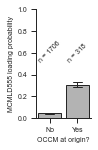

In [20]:
# 555-MCM loading at first and second origin
fig, axes = plt.subplots(figsize=(1,2))

# all molecules
data = df

# set up a _plot_df
ori1 = data[['Ori1_655-MCM_before', 'Ori1_555-MCM_after', 'Ori1_pushed']].copy()
ori1['origin'] = 'first'
ori1.columns = ['655-MCM_before', '555-MCM_after', '655-MCM_pushed', 'origin']

# for ori2 exclude all molecules with pushed MCM from ori1
ori2 = data[data['Ori1_pushed']==0][['Ori2_655-MCM_before', 'Ori2_555-MCM_after', 'Ori2_pushed']].copy()
ori2['origin'] = 'second'
ori2.columns = ['655-MCM_before', '555-MCM_after', '655-MCM_pushed', 'origin']

_plot_df = pd.concat([ori1, ori2])

# assign x_labels
_plot_df['x_label'] = (_plot_df['655-MCM_before'].apply(lambda mcm: 'MCM+' if mcm else 'MCM-') +
                       _plot_df['655-MCM_pushed'].apply(lambda pushed: '_pushed+' if pushed else '_pushed-'))

# plot
sns.barplot(x='x_label', y='555-MCM_after', data=_plot_df, order='MCM-_pushed- MCM+_pushed-'.split(),
            palette=[palettes['qualitative'][7],palettes['qualitative'][7],palettes['qualitative'][7]],
            lw=1, edgecolor='.15', capsize=.3,errwidth=1, ax=axes, saturation=1.0,
            n_boot=10000, seed=42, ci=68, errcolor='.15')

axes.set_xlabel('OCCM at origin?')
axes.set_ylabel('MCMLD555 loading probability')
axes.set_ylim(0,1)
#axes.tick_params(axis='x', rotation=45)

#calculate number of observations
nobs = _plot_df['x_label'].value_counts()
     
#put nobs into plot
pos = range(len(nobs))
for tick,label in zip(pos,axes.get_xticklabels()):

    axes.text(pos[tick], .5, "n = "+str(nobs[label.get_text()]), horizontalalignment='center', 
              verticalalignment='bottom', color='.15', rotation=45)

axes.set_xticklabels(['No', 'Yes'])
sns.despine()
#plt.tight_layout()

plt.savefig(dir_out+'6C_555-MCM_recruitment_vs_OCCM_sameOri_notransc.svg',transparent=True)

### Figure 6E: MCM recruitment vs OCCM pushed to other ori

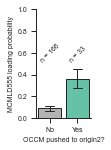

In [21]:
# 555-MCM loading at second origin with 655-MCM at ori1 but not at ori2 at the beginning
fig, axes = plt.subplots(figsize=(1,2))

# all molecules
data = df[(df['Ori2_655-MCM_before']==0) & (df['Ori1_655-MCM_before']==1)]
#data = df[(df['Ori2_655-MCM_before']==0)]
# plot
sns.barplot(x='T7T_outcome', y='Ori2_555-MCM_after', data=data, order='na t'.split(),
            palette=[palettes['qualitative'][7], palettes['qualitative'][0], palettes['qualitative'][3]],
            lw=1, edgecolor='.15', capsize=.3,errwidth=1, ax=axes, saturation=1.0,
            n_boot=10000, seed=42, ci=68, errcolor='.15')

axes.set_xlabel('OCCM pushed to origin2?')
axes.set_ylabel('MCMLD555 loading probability')
axes.set_ylim(0,1)
#axes.tick_params(axis='x', rotation=45)

#calculate number of observations
nobs = {k:v for k,v in data['T7T_outcome'].value_counts().items()}

#put nobs into plot
pos = range(len(nobs))
for tick,label in zip(pos,axes.get_xticklabels()):
    
    transform=axes.transAxes,axes.text(pos[tick], 0.5, "n = "+str(nobs[label.get_text()]),
    horizontalalignment='center',verticalalignment='bottom', rotation=45)


axes.set_xticklabels(['No', 'Yes'])
sns.despine()
#plt.tight_layout()

plt.savefig(dir_out+'6E_555-MCM_recruitment_otherOri.svg',transparent=True)

In [22]:
data.groupby('T7T_outcome').describe()

Molecule                                                          \
               count        mean         std  min   25%   50%     75%    max   
T7T_outcome                                                                    
e               19.0   43.789474  105.407452  0.0   2.5   4.0   15.00  381.0   
na             166.0  138.674699  138.083427  4.0  39.0  73.5  234.25  457.0   
t               33.0   59.606061  114.495071  0.0   3.0   7.0   12.00  428.0   

            Ori1_655-MCM_before       ... Ori2_pushed      Ori2_555-MCM_after  \
                          count mean  ...         75%  max              count   
T7T_outcome                           ...                                       
e                          19.0  1.0  ...         0.0  1.0               19.0   
na                        166.0  1.0  ...         0.0  0.0              166.0   
t                          33.0  1.0  ...         0.0  0.0               33.0   

                                                          
                 mean       std  min  25%  50%  75%  max  
T7T_outcome                                               
e            0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
na           0.090361  0.287566  0.0  0.0  0.0  0.0  1.0  
t            0.363636  0.488504  0.0  0.0  0.0  1.0  1.0  

[3 rows x 72 columns]

In [23]:
df.head()

,Molecule,Ori1_655-MCM_before,Ori1_655-MCM_after,Ori1_pushed,T7T_outcome,Ori1_555-MCM_after,Ori2_655-MCM_before,Ori2_655-MCM_after,Ori2_pushed,Ori2_555-MCM_after,tags,comments
0,0.0,1.0,0.0,1.0,e,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,1.0,0.0,1.0,t,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,2.0,1.0,0.0,1.0,t,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,3.0,1.0,0.0,1.0,t,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,4.0,1.0,0.0,1.0,e,0.0,0.0,0.0,0.0,0.0,NaN,NaN
